## Bootcamp: Ciencia de Datos e Inteligencia Artificial
## Proyecto del Módulo 5: Aprendizaje profundo con redes neuronales
¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 5! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

# Objetivos
- Aplicarás los conocimientos que has adquirido sobre redes neuronales a contextos de la vida real.
- Puntuarás la precisión y valor de los modelos creados.
- Generarás gráficas que muestren la evolución de la precisión de los modelos.

> NOTA: El modelo se entrena en inglés, así que si quieres traducir estas noticias para comprenderlas mejor te puedes apoyar en herramientas como Google Translate, pero recuerda usar el texto en inglés para tu modelo.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Proyecto Modulo 5/WELFake_Dataset.csv")

In [ ]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
# Se elimina la columna 0
df = df.drop(columns=["Unnamed: 0"])



# Parte 1

La propagación de *fake news* o noticias falsas se incrementó a partir de la pandemia por COVID-19. Estas son un problema alarmante porque hacen que las personas realicen actividades que normalmente no llevarían a cabo o que actúen de manera caótica. Un ejemplo es [-> esta noticia <-](https://drive.google.com/file/d/1PrfN83Fm1ib5mHYN6SULVe9CJVECUNn2/view?usp=share_link), en la que se relata cómo notas falsas acerca del daño que ocasiona la 5G al cuerpo provocaron que muchas personas en el Reino Unido quemaran torres de telecomunicaciones aun sin ser estas de 5G.

A ti, como persona experta en redes neuronales, te han encargado hacer un predetector de noticias falsas para los *fact-checker* del mundo.

Para realizarlo, tienes a tu disposición el siguiente *dataset*: https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification

## Criterios de evaluación
- Utiliza Keras para entrenar un modelo de *Deep Learning* que ayude a detectar una noticia falsa. Recuerda hacer la limpieza de datos y el análisis exploratorio correspondiente para obtener el puntaje completo (2 puntos).
  - Pista: Revisa esto -> https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
- Determina el número de épocas a usar y explica por escrito por qué llegaste a esta conclusión. Si no hay explicación, no hay un punto (2 puntos).
- Calcula la precisión y pérdida del modelo (1 punto) y grafícalo a través de las épocas (1 punto).
- Prueba tu modelo con esta noticia falsa: https://www.breitbart.com/politics/2016/09/10/exposed-fbi-director-james-comeys-clinton-foundation-connection/
- Prueba tu modelo con esta noticia verdadera: https://www.washingtonpost.com/sports/2022/11/14/world-cup-female-referee-kathryn-nesbitt/ (2 puntos por ambas comprobaciones).

## Punto extra
- Usa PyTorch para el entrenamiento.



## Analisis Exploratorio

In [ ]:
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


Observamos que el dataframe tiene tres columnas: "title", "text", y "label" (el enunciado de kaggle indica que: 1 = verdadera y 0 = falsa)

In [ ]:
# Vemos la informacion general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
df.shape

(72134, 3)

Se observa que el dataset cuenta con 72.134 filas y un total de 3 columnas, donde en las columnas "title" hay 71.576 valores no nules y en "text" 72.095 valores no nulos, esto significa que en ambas columnas hay valores faltantes.

In [ ]:
# Vemos la frecuencia de clase
df["label"].value_counts("%")

,proportion
label,
1,0.514404
0,0.485596


/tmp/ipython-input-3416391635.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["label"], palette=["red", "blue"])


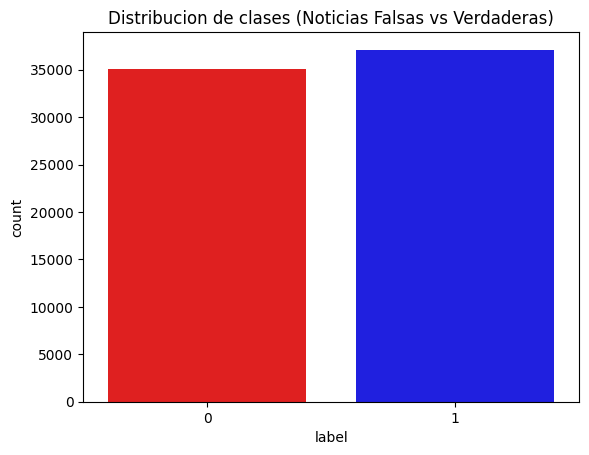

In [ ]:
# Verificamos la distribucion de clases
sns.countplot(x=df["label"], palette=["red", "blue"])
plt.title("Distribucion de clases (Noticias Falsas vs Verdaderas)")
plt.show()

Se observa un dataset balanceado, donde un 51% corresponde a noticias verdaderas y un 49% a noticias falsas.

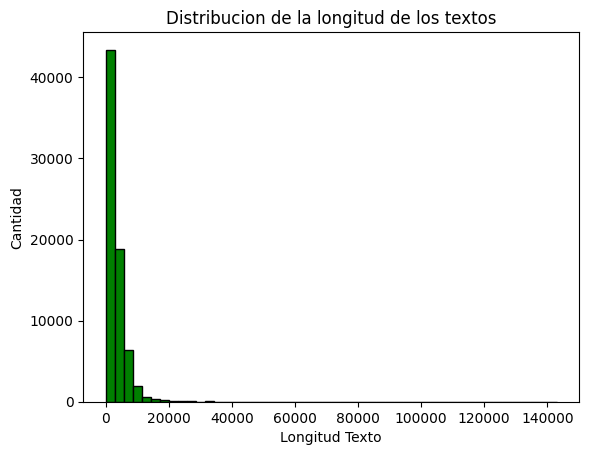

In [ ]:
# Vemos la distribucion de la longitud en los textos
plt.hist(df["text"].str.len(), bins=50, color="green", edgecolor="black")
plt.title("Distribucion de la longitud de los textos")
plt.xlabel("Longitud Texto")
plt.ylabel("Cantidad")
plt.show()

Se observa que muchas noticias poseen pocos caracteres o longitud en los textos

In [ ]:
# Vemos si hay valores nulos
df.isnull().sum()

,0
title,558
text,39
label,0


In [ ]:
# Valores faltantes por columna (%)
missing_percentage = df.isnull().sum() / len(df) * 100
print("Porcentaje de valores perdidos por columna")
print(missing_percentage)

# Porcentaje de filas a eliminar
rows_before_drop = df.shape[0]
df_dropped = df.dropna()
rows_after_drop = df_dropped.shape[0]
percentage_rows_dropped = (rows_before_drop - rows_after_drop) / rows_before_drop * 100

print(f"\nPorcentaje de filas a eliminar si se eliminan filas con valores faltantes: {percentage_rows_dropped:.2f}%")

Porcentaje de valores perdidos por columna
title    0.773560
text     0.054066
label    0.000000
dtype: float64

Porcentaje de filas a eliminar si se eliminan filas con valores faltantes: 0.83%


Se observa que si eliminamos los datos faltantes en este dataset, se pierde aproximadamente un 0,83% del total de filas del dataset. Al ser un porcentaje menor a 1%, eliminar las filas no tendría una significancia considerable dado el tamaño total del dataset, por tanto se opta por eliminarlas.

In [ ]:
# Valores Nulos

print(f"dimensiones original: {df.shape}")

# Eliminamos las filas donde "text" es Nulo, ya que no se pueden clasificar noticias sin texto
df = df.dropna(subset=["text"])
print(f"dimensiones sin text null: {df.shape}")

# Eliminamos las filas donde "title" es Nulo, ya que es mejor trabajar las noticias que tengan titulo
df = df.dropna(subset=["title"])
print(f"dimensiones sin title null: {df.shape}")

df.isnull().sum()

dimensiones original: (72134, 3)
dimensiones sin text null: (72095, 3)
dimensiones sin title null: (71537, 3)


,0
title,0
text,0
label,0


In [ ]:
# Contamos las clases
df["label"].value_counts("%")

,proportion
label,
1,0.510351
0,0.489649


Se observa que luego de eliminar las filas, la proporcion se mantiene en los porcentajes

## Preprocesamiento de texto

### Limpieza de Texto

In [ ]:
def limpiar_texto(texto):
    texto = texto.lower() # Para convertir a minusculas, asi estandarizamos el texto
    texto = re.sub(r"\W", " ", texto) # Para reemplazar caracteres especiales por espacios
    texto = re.sub(r"\s+", " ", texto).strip() # Para eliminar los espacios extra

# Separamos en palabras, eliminamos stopwords y volvemos a unirlas
    words = texto.split()
    words = [word for word in words if word not in stop_words]

    return " ".join(words) # Reconstruye el texto limpio

In [ ]:
# ver ejemplos antes de la limpieza
df[["title", "text"]].head()

,title,text
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ..."
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will..."
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...


In [ ]:
# Aplicamos la funcion a las columnas "title" y "text"
df["title"] = df['title'].apply(limpiar_texto)
df['text'] = df['text'].apply(limpiar_texto)

In [ ]:
# vemos ejemplos despues de la limpieza
df[["title", "text"]].head()

,title,text
0,law enforcement high alert following threats c...,comment expected barack obama members fyf911 f...
2,unbelievable obama attorney general says charl...,demonstrators gathered last night exercising c...
3,bobby jindal raised hindu uses story christian...,dozen politically active pastors came private ...
4,satan 2 russia unvelis image terrifying new su...,rs 28 sarmat missile dubbed satan 2 replace ss...
5,time christian group sues amazon splc designat...,say one time someone sued southern poverty law...


In [ ]:
# vemos la primera noticia
df['title'][0][:1000]

'law enforcement high alert following threats cops whites 9 11by blacklivesmatter fyf911 terrorists video'

In [ ]:
# vemos la primera noticia
df['text'][0][:1000]

'comment expected barack obama members fyf911 fukyoflag blacklivesmatter movements called lynching hanging white people cops encouraged others radio show tuesday night turn tide kill white people cops send message killing black people america one f yoflag organizers called sunshine radio blog show hosted texas called sunshine f ing opinion radio show snapshot fyf911 lolatwhitefear twitter page 9 53 p shows urging supporters call fyf911 tonight continue dismantle illusion white snapshot twitter radio call invite fyf911the radio show aired 10 00 p eastern standard time show callers clearly call lynching killing white people 2 39 minute clip radio show heard provided breitbart texas someone would like referred hannibal already received death threats result interrupting fyf911 conference calls unidentified black man said mother f kers start f ing like us bunch ni ers takin one us roll said cause already roll gangs anyway six seven black mother f ckers see white person lynch ass let turn ta

### Tokenización y Vectorización

Convertimos el texto en secuencia de numeros para que la red neuronal pueda procesar el texto.

In [ ]:
# Definimos hiperparámetros para la tokenización
MAX_NB_WORDS = 30000 # número máximo de palabras en el vocabulario
MAX_SEQUENCE_LENGHT = 500 # longitud máxima de las secuencias

# Inicialización del tokenizador
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(df["text"]) # para ajustar el tokenizador con el texto

# Se convierten los textos en secuencias de números
sequences = tokenizer.texts_to_sequences(df["text"])

# Se rellenan las secuencias para que haya una longitud semejante
X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGHT)

# Convertimos la columna "label" en variable objetivo
y = df["label"].values

# Vemos las dimensiones de los datos
print(f"Dimensiones de X: {X.shape}, Dimensiones de y: {y.shape}")

Dimensiones de X: (71537, 500), Dimensiones de y: (71537,)


In [ ]:
df["text"][:1]

,text
0,comment expected barack obama members fyf911 f...


In [ ]:
len(sequences)

71537

In [ ]:
X[:1].shape

(1, 500)

In [ ]:
X[:1]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,   411,   447,   410,    15,   166,     1,
            1, 11409,  3455,    74, 16197,  4994,    36,     5,  2600,
         3089,   266,   979,   131,   140,   257,   618,  7411,  1367,
           36,     5,  2600,  1164,   573,  1090,   125,     5,    67,
            7,   735,     1,  4605,    74, 11410,   979,  2902,   131,
         3233,   456,    74, 11410,   735,  6335,  1030,   979,   131,
        11738,     1,     1,    84,   852,   427,  3900,   838,   639,
         3094,   308,   255,     1,  2217,   354,  6018,  7918,    36,
        11738,    84,   979,   255,  6173,     1,   979,   131,  5677,
          180,  3040,   838,   972,  1606,    19,   131, 20837,   825,
          255, 16197,  1090,    36,     5,   141,  3441,  2265,  3776,
          979,   131,   799,  1037,   596,   456,   416,     4,    14,
         2218,     1,   177,   576,   388,  1231,   643, 13528,     1,
      

### Division de datos en entrenamiento y prueba

In [ ]:
# Dividimos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345, stratify=y)

# Verificamos la cantidad de datos en cada conjunto
print(f"Datos de entrenamiento: {X_train.shape}, Datos de prueba: {X_test.shape}")

Datos de entrenamiento: (50075, 500), Datos de prueba: (21462, 500)


## Construccion del modelo con Keras

In [ ]:
# Creamos modelo secuencial
model = Sequential()

# Capa de embedding
model.add(Embedding(input_dim=MAX_NB_WORDS, output_dim=130))

# Capas flatten
model.add(Flatten())

# Capa densa oculta
model.add(Dense(64, activation="relu"))

# Regularización con dropout
model.add(Dropout(0.5))

# Capa de salida con activación sigmoide para clasificación binaria
model.add(Dense(1, activation="sigmoid"))

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

# Construir el modelo explícitamente para que no haya "unbuilt" en summary
model.build(input_shape=(None, MAX_SEQUENCE_LENGHT))

#Mostrar resumen del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 500, 130)       │     3,900,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     4,160,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,060,129 (30.75 MB)

 Trainable params: 8,060,129 (30.75 MB)

 Non-trainable params: 0 (0.00 B)

## Entrenamiento del Modelo

In [ ]:
# Entrenamos el modelo
history = model.fit(X_train, y_train, epochs=4, batch_size=32, validation_split=0.2)

Epoch 1/4
1252/1252 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7301 - loss: 0.4953 - val_accuracy: 0.9488 - val_loss: 0.1378
Epoch 2/4
1252/1252 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9727 - loss: 0.0900 - val_accuracy: 0.9609 - val_loss: 0.1050
Epoch 3/4
1252/1252 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9936 - loss: 0.0322 - val_accuracy: 0.9616 - val_loss: 0.1037
Epoch 4/4
1252/1252 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9979 - loss: 0.0131 - val_accuracy: 0.9612 - val_loss: 0.1129


Se determinó usar 10 epocas ya que como punto de partida se necesitaba un valor razonable pero no muy alto, por lo que el numero 10 permite que el modelo aprenda de datos sin necesariamente entrenarse por mucho tiempo, además es un numero que permite observar el proceso de entrenamiento durante un tiempo prudente

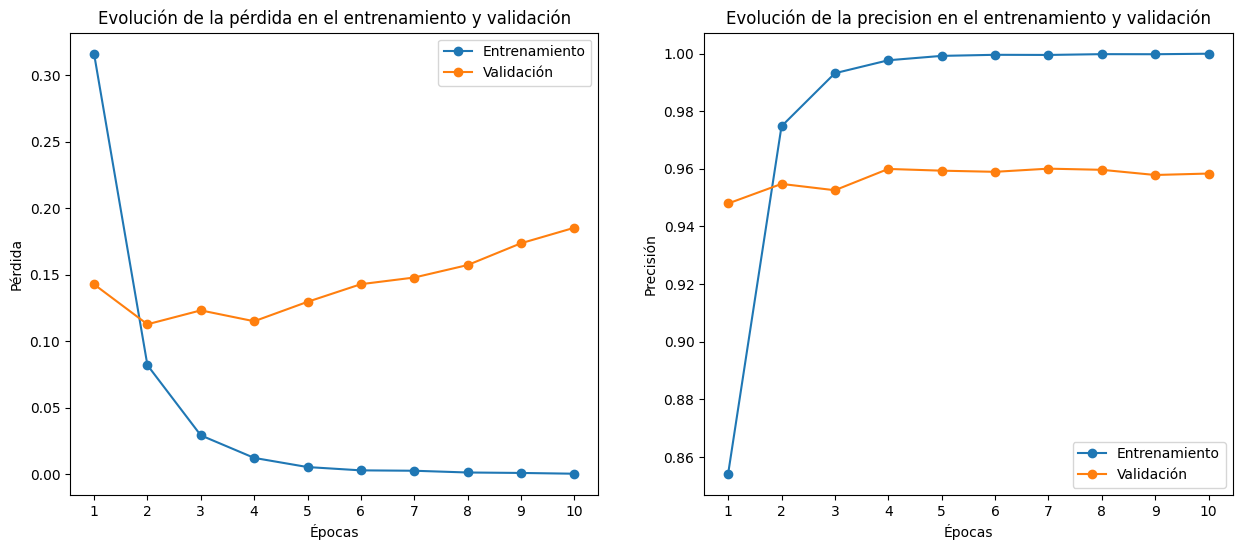

In [ ]:
# Creamos una figura con 1 fila y 2 columnas
plt.figure(figsize=(15,6))

# Gráfico de pérdida
plt.subplot(1, 2, 1)
plt.plot(range(1, len(history.history["loss"]) +1), history.history["loss"], "o-", label="Entrenamiento")
plt.plot(range(1, len(history.history["val_loss"]) +1), history.history["val_loss"], "o-", label="Validación")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.title("Evolución de la pérdida en el entrenamiento y validación")
plt.xticks(range(1, len(history.history["loss"])+1))
plt.legend()

# Gráfico de precisión
plt.subplot(1, 2, 2)
plt.plot(range(1, len(history.history["accuracy"]) +1), history.history["accuracy"], "o-", label="Entrenamiento")
plt.plot(range(1, len(history.history["val_accuracy"]) +1), history.history["val_accuracy"], "o-", label="Validación")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.title("Evolución de la precision en el entrenamiento y validación")
plt.xticks(range(1, len(history.history["accuracy"])+1))
plt.legend()

Se puede observar que el modelo esta aprendiendo, ya que se ve una rápida disminución de la pérdida de entrenamiento y el aumento de la precisión nos indica que el modelo va aprendiendo de los datos, sin embargo podemos observar una divergencia entre la curva de pérdida del entrenamiento y la curva de pérdida de validación, lo que indica un sobreajuste. Por lo tanto, observando los gráficos, se puede definir que el rendimiento óptimo en el conjunto de validación está entre la época 3 o 4, donde se observa una mínima pérdida de validación y la precisión de validación es alta. Se define entonces el modelo con 4 epocas.

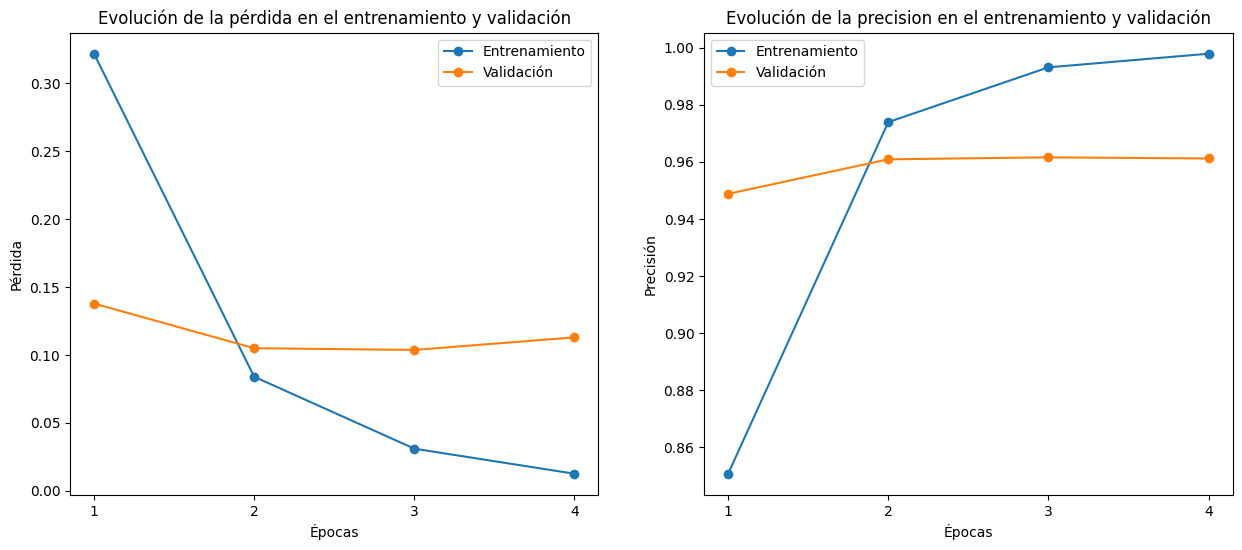

In [ ]:
# Creamos una figura con 1 fila y 2 columnas
plt.figure(figsize=(15,6))

# Gráfico de pérdida
plt.subplot(1, 2, 1)
plt.plot(range(1, len(history.history["loss"]) +1), history.history["loss"], "o-", label="Entrenamiento")
plt.plot(range(1, len(history.history["val_loss"]) +1), history.history["val_loss"], "o-", label="Validación")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.title("Evolución de la pérdida en el entrenamiento y validación")
plt.xticks(range(1, len(history.history["loss"])+1))
plt.legend()

# Gráfico de precisión
plt.subplot(1, 2, 2)
plt.plot(range(1, len(history.history["accuracy"]) +1), history.history["accuracy"], "o-", label="Entrenamiento")
plt.plot(range(1, len(history.history["val_accuracy"]) +1), history.history["val_accuracy"], "o-", label="Validación")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.title("Evolución de la precision en el entrenamiento y validación")
plt.xticks(range(1, len(history.history["accuracy"])+1))
plt.legend()

## Evaluación del modelo

In [ ]:
# Evaluamos el modelo en los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Precisión en test: {accuracy:.4f}, Pérdida en test: {loss:.4f}")

671/671 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9600 - loss: 0.1254
Precisión en test: 0.9608, Pérdida en test: 0.1156


## Probando el Modelo

In [ ]:
# Guardamos el modelo
model.save('fake_news_model.h5')

print("Model saved to fake_news_model.h5")

Model saved to fake_news_model.h5


In [ ]:
import pickle

# Guardamos el tokenizer
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("Tokenizer saved to tokenizer.pkl")

Tokenizer saved to tokenizer.pkl


In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pickle


def predict_news(url, model, tokenizer, max_len=MAX_SEQUENCE_LENGHT):
    try:
        response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'}, timeout=10)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')
        paragraphs = soup.find_all('p')
        text = ' '.join([p.get_text() for p in paragraphs])


        cleaned_text = limpiar_texto(text)

        sequence = tokenizer.texts_to_sequences([cleaned_text])
        padded_sequence = pad_sequences(sequence, maxlen=max_len)

        prediction = model.predict(padded_sequence)


        probability_true = prediction[0][0]

        if probability_true > 0.9:
            return "Noticia Verdadera", probability_true
        else:
            return "Noticia Falsa", 1 - probability_true

    except requests.exceptions.RequestException as e:
        return f"Error al acceder a la URL: {e}", 0
    except Exception as e:
        return f"Error en la predicción: {e}", 0

fake_news_url = "https://www.breitbart.com/politics/2016/09/10/exposed-fbi-director-james-comeys-clinton-foundation-connection/"
true_news_url = "https://www.washingtonpost.com/sports/2022/11/14/world-cup-female-referee-kathryn-nesbitt/"


In [ ]:
# Definimos las URLS
fake_news_url = "https://www.breitbart.com/politics/2016/09/10/exposed-fbi-director-james-comeys-clinton-foundation-connection/"
true_news_url = "https://www.washingtonpost.com/sports/2022/11/14/world-cup-female-referee-kathryn-nesbitt/"

# Probar el modelo con la noticia falsa
print("Probando con la noticia falsa:")
prediccion_falsa, prob_falsa = predict_news(fake_news_url, model, tokenizer, MAX_SEQUENCE_LENGHT)
print(f"Predicción: {prediccion_falsa}, Probabilidad: {prob_falsa:.2f}\n")

# Probar el modelo con la noticia verdadera
print("Probando con la noticia verdadera:")
prediccion_verdadera, prob_verdadera = predict_news(true_news_url, model, tokenizer, MAX_SEQUENCE_LENGHT)
print(f"Predicción: {prediccion_verdadera}, Probabilidad: {prob_verdadera:.2f}")

Probando con la noticia falsa:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicción: Noticia Verdadera, Probabilidad: 0.99

Probando con la noticia verdadera:
Predicción: Error al acceder a la URL: HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=10), Probabilidad: 0.00


# Parte 2
Se acerca el fin de año y con ello la necesidad de realizar los balances generales, estados financieros, etc. Una empresa te contrata para capturar manualmente todos sus recibos de ventas, solo que hay un pequeño problema: todos están hechos a mano, por lo que sería muy tardado ver recibo tras recibo y capturarlos de forma manual.

Sin embargo, recuerdas que aprendiste acerca de las redes neuronales convolucionales. Por ello, decides hacer un modelo que afronte este problema con Inteligencia Artificial y que convierta la escritura a mano en caracteres.

Tienes el *dataset* de dígitos escritos a mano de Mnist a tu disposición:
https://www.tensorflow.org/datasets/catalog/mnist , que puedes invocar de esta manera:


```python
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

```

## Criterios de evaluación
- Entrena el modelo utilizando Tensorflow y todas las capas que creas necesarias. Explica por qué elegiste esas capas. Si no hay explicación, se invalida un punto (2 puntos).
- Grafica la evolución de la pérdida y la precisión del entrenamiento y genera un conjunto de 10 predicciones con los mismos datos del *dataset* (2 puntos).


¡Éxito! Te vemos en el contenido del siguiente módulo.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Cargamos el dataset MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Normalizamos las imágenes
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Se añade una dimensión de canal (escala de grises)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [ ]:
# Construir el modelo CNN
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compilamos el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Entrenamos el modelo
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9001 - loss: 0.3185 - val_accuracy: 0.9858 - val_loss: 0.0429
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9833 - loss: 0.0512 - val_accuracy: 0.9888 - val_loss: 0.0335
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9888 - loss: 0.0359 - val_accuracy: 0.9905 - val_loss: 0.0275
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9909 - loss: 0.0272 - val_accuracy: 0.9918 - val_loss: 0.0259
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9930 - loss: 0.0228 - val_accuracy: 0.9912 - val_loss: 0.0311
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9944 - loss: 0.0160 - val_accuracy: 0.9885 - val_loss: 0.0372
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9949 - loss: 0.0155 - val_accuracy: 0.9919 - val_loss: 0.0250
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9951 - loss: 0.0144 

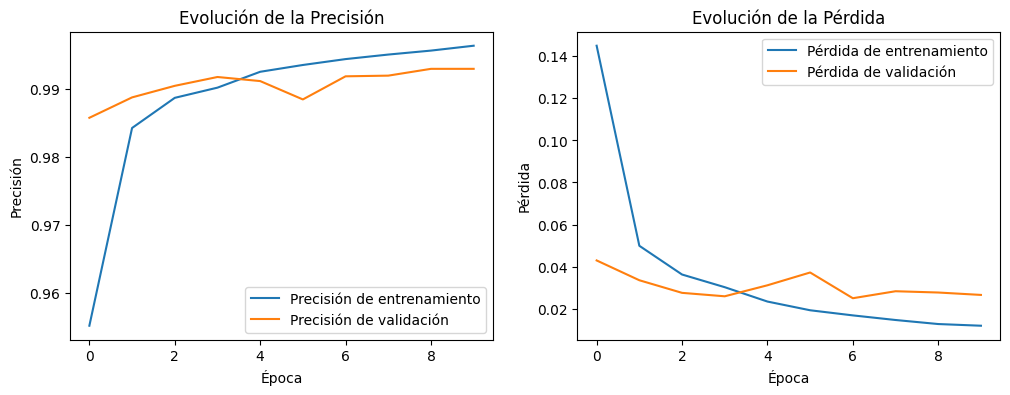

In [ ]:
# Graficamos la precisión y la pérdida
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Evolución de la Precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Evolución de la Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
Predicciones para las primeras 10 imágenes del conjunto de prueba:
Imagen 0: Predicción = 7, Real = 7


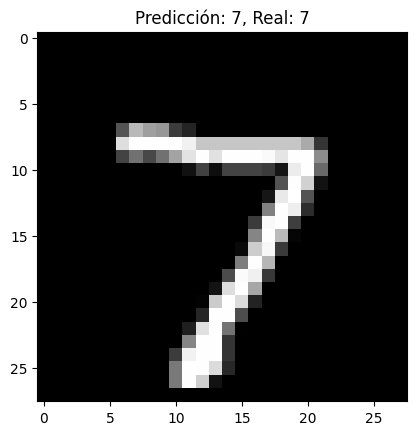

Imagen 1: Predicción = 2, Real = 2


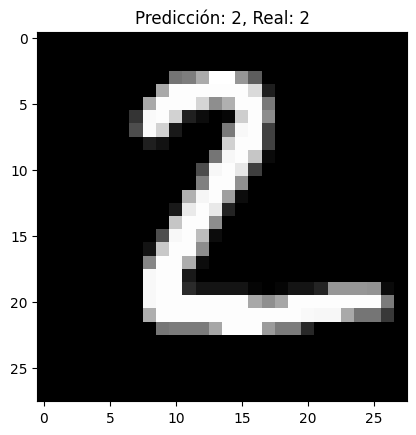

Imagen 2: Predicción = 1, Real = 1


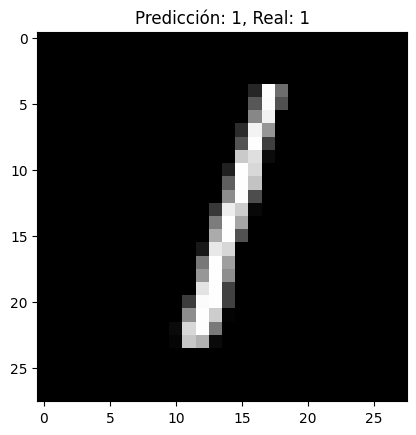

Imagen 3: Predicción = 0, Real = 0


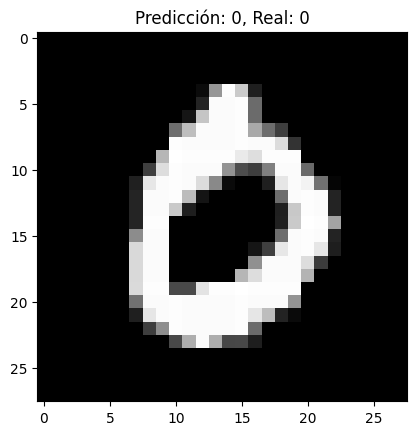

Imagen 4: Predicción = 4, Real = 4


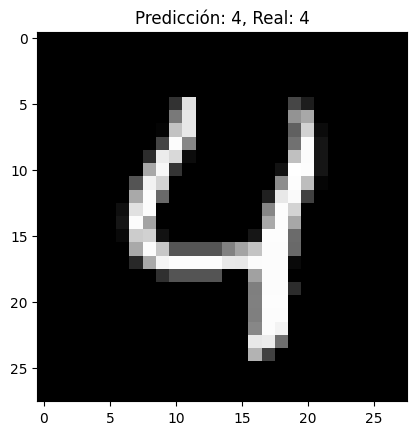

Imagen 5: Predicción = 1, Real = 1


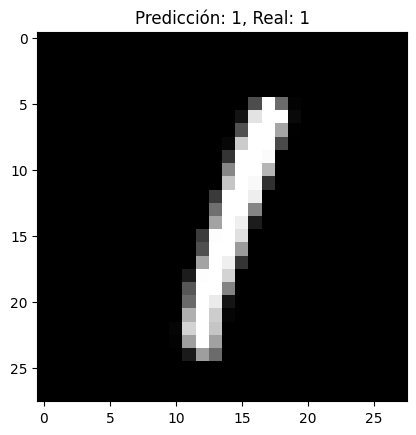

Imagen 6: Predicción = 4, Real = 4


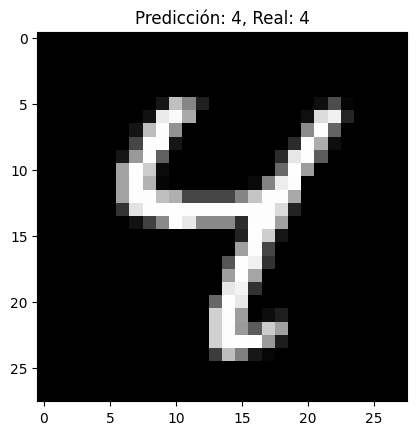

Imagen 7: Predicción = 9, Real = 9


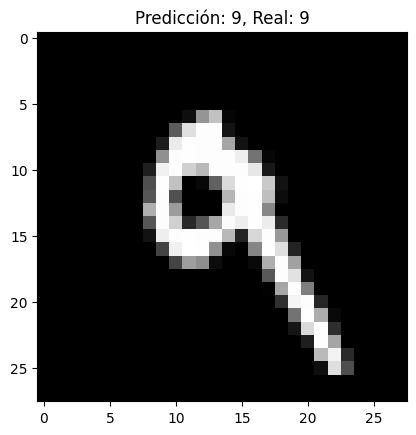

Imagen 8: Predicción = 5, Real = 5


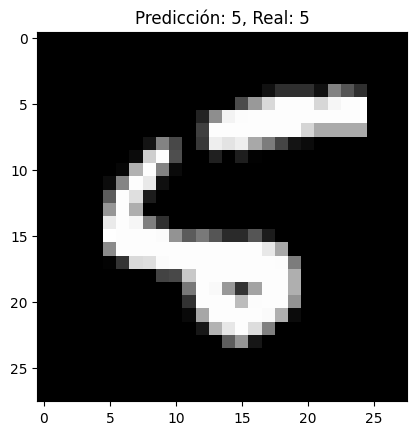

Imagen 9: Predicción = 9, Real = 9


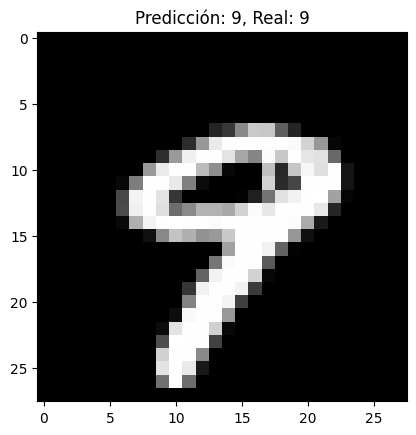

In [ ]:
# Hacemos 10 predicciones
predictions = model.predict(x_test[:10])
predicted_classes = np.argmax(predictions, axis=1)

# Mostamos las predicciones junto con las etiquetas reales
print("Predicciones para las primeras 10 imágenes del conjunto de prueba:")
for i in range(10):
    print(f"Imagen {i}: Predicción = {predicted_classes[i]}, Real = {y_test[i]}")
    # Opcional: mostrar la imagen
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicción: {predicted_classes[i]}, Real: {y_test[i]}")
    plt.show()

# Task
Test the trained model with the following fake news article: "https://www.breitbart.com/politics/2016/09/10/exposed-fbi-director-james-comeys-clinton-foundation-connection/" and the following true news article: "https://www.washingtonpost.com/sports/2022/11/14/world-cup-female-referee-kathryn-nesbitt/".

## Obtener el contenido de las urls

### Subtask:
Utilizar una biblioteca como `requests` para descargar el contenido HTML de las dos URLs proporcionadas.


**Reasoning**:
Import the requests library and fetch the content of the two URLs.



## Extraer el texto relevante

### Subtask:
Analizar el HTML (posiblemente usando `BeautifulSoup`) para extraer el texto principal de cada artículo, ignorando el código HTML y otros elementos irrelevantes.


**Reasoning**:
Extract the main text content from the HTML of both news articles using BeautifulSoup.



## Limpiar y preprocesar el texto

### Subtask:
Aplicar la función `limpiar_texto` que ya definiste para limpiar el texto extraído de cada artículo.


**Reasoning**:
Apply the `limpiar_texto` function to the extracted text from both news articles and print the cleaned text.



**Reasoning**:
The previous attempt failed because the variables `fake_news_text` and `true_news_text` were not defined in the current session. This is likely due to a notebook restart or clearing of outputs. I need to re-execute the code that extracts the text from the URLs.



**Reasoning**:
The previous attempt failed because the variables `fake_news_response` and `true_news_response` were not defined. This indicates that the initial request to fetch the URLs also needs to be re-executed. I will combine the steps of fetching the URLs, extracting the text, cleaning the text, and printing the result.

